# **Brand Detection**

# Data Augmentation

In [69]:
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.optim as optim
import torch.nn.functional as F

# Define the transformation to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the dataset
train_dataset = datasets.ImageFolder(root='./dataset/brands/train/', transform=transform)
test_dataset = datasets.ImageFolder(root='./dataset/brands/test/', transform=transform)

# Create data loaders to facilitate batch processing
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)


In [79]:
for i, j in train_loader:
    size = i.shape
    break

print(size)

torch.Size([8, 3, 224, 224])


In [71]:
count = 0
for xb, yb in train_loader:
  #Your code here
  count += 1
print(f'There are {count} batches in train_loader')

count = 0
for xb, yb in test_loader:
  #Your code here
  count += 1
print(f'There are {count} batches in test_loader')

There are 117 batches in train_loader
There are 17 batches in test_loader


In [84]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(8, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        
        return x

In [85]:
model=CNN()
#model=CNN_seq()


#Set loss and optimiser 
loss_fn = nn.CrossEntropyLoss()

optimiser = optim.Adam(model.parameters())

epoch_losses = []

model.train()
epochSize=10
for epoch in range(epochSize):
    epoch_loss = 0.0
    for batch_id, (input,target) in enumerate(train_loader):

        optimiser.zero_grad() 
        output = model(input) #forward 

        loss = loss_fn(output,target)
        
        
        loss.backward() #back prop
        optimiser.step()#update weights

        epoch_loss += loss.item()

        if batch_id%100==0:
            print(f'Epoch:{epoch}/{epochSize} Batch:{batch_id+1} Loss:{loss.item()}')

    epoch_loss /= len(train_loader)
    epoch_losses.append(epoch_loss)


Epoch:0/10 Batch:1 Loss:0.6889914274215698


/Users/waizwafiq/Documents/Projects/fakeshoe_detection/auth_shoe/lib/python3.9/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch:0/10 Batch:101 Loss:0.7197214961051941
Epoch:1/10 Batch:1 Loss:0.6420183181762695
Epoch:1/10 Batch:101 Loss:0.5620333552360535
Epoch:2/10 Batch:1 Loss:0.484430193901062
Epoch:2/10 Batch:101 Loss:0.5758478045463562
Epoch:3/10 Batch:1 Loss:0.3450378179550171
Epoch:3/10 Batch:101 Loss:0.2935866713523865
Epoch:4/10 Batch:1 Loss:0.09338415414094925
Epoch:4/10 Batch:101 Loss:0.05317631736397743
Epoch:5/10 Batch:1 Loss:0.03972829133272171
Epoch:5/10 Batch:101 Loss:0.008313202299177647
Epoch:6/10 Batch:1 Loss:0.004892686381936073


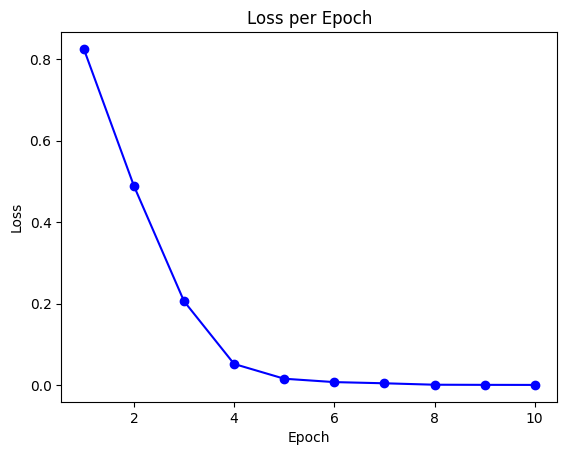

In [50]:
import matplotlib.pyplot as plt

# Plot the loss-epoch graph
plt.plot(range(1, epochSize+1), epoch_losses, 'b-o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()